In [1]:
import sys
import ROOT
import numpy as np
from ROOT import TH1D,TF1, gRandom, gPad, gStyle, gSystem, gROOT
import matplotlib as mpl
import matplotlib.pyplot as plt
from ROOT import TChain, TSelector, TTree
import os

import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.colors as colors

mpl.rcParams['text.usetex'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")

Welcome to JupyROOT 6.24/02


/tmp/ipykernel_27280/3272581815.py:22: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command


In [21]:
folder = "/home/jat89/Software/Geant4Work/examples/TestEm18_build/"
file = ROOT.TFile(folder + "muon.root", "READ")
file.ls()

TFile**		/home/jat89/Software/Geant4Work/examples/TestEm18_build/muon.root	
 TFile*		/home/jat89/Software/Geant4Work/examples/TestEm18_build/muon.root	
  KEY: TDirectoryFile	ntuple;1	ntuple
  KEY: TH1D	0;1	dummy
  KEY: TH1D	1;1	step size of primary track
  KEY: TH1D	2;1	energy continuously deposited along primary track
  KEY: TH1D	3;1	energy transfered to secondaries by ionisation
  KEY: TH1D	4;1	energy transfered to secondaries by Bremsstrahlung
  KEY: TH1D	5;1	energy transfered to secondaries by (e+,e-) production
  KEY: TH1D	6;1	total energy transfered to secondaries
  KEY: TH1D	7;1	total energy lost by primary track
  KEY: TH1D	8;1	total energy lost by primary track from energy balance
  KEY: TH1D	9;1	energy continuously deposited along secondary tracks
  KEY: TH1D	10;1	total energy deposited
  KEY: TH1D	11;1	energy spectrum of gamma
  KEY: TH1D	12;1	energy spectrum of e-
  KEY: TH1D	13;1	energy spectrum of e+
  KEY: TH1D	14;1	direction: phi
  KEY: TH1D	15;1	direction: costheta


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


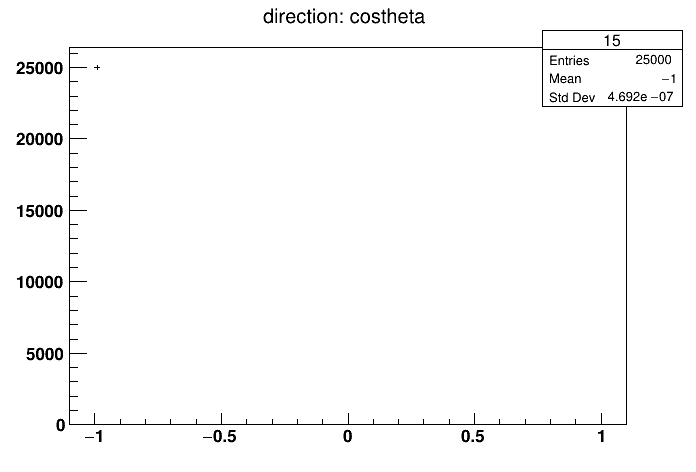

In [22]:
# gROOT.SetStyle("ATLAS");
h1 = file.Get("15")
c2 = ROOT.TCanvas("c2", "c2", 700, 500)
h1.Draw("")
c2.Draw()
c2.Delete

In [23]:
a = file.Get("ntuple")
a.ls()

TDirectoryFile*		ntuple	ntuple
 KEY: TTree	parTup;1	Primary Particle Tuple


In [24]:
tree = a.Get("parTup")

In [25]:
energy = []
for event in tree:
    energy.append(event.Edeposited)

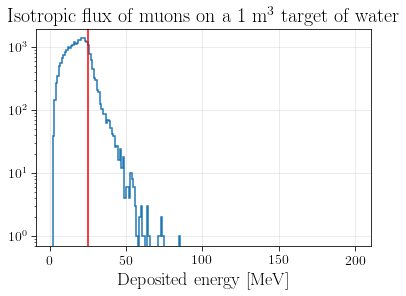

In [28]:
plt.hist(energy, bins = 200, range = (1,200), histtype="step", lw = 1.5);
plt.yscale("log")
plt.xlabel("Deposited energy [MeV]")
plt.title("Isotropic flux of muons on a 1 m$^3$ target of water")
plt.grid(alpha = 0.3)
plt.axvline(25, c = "red")